# Question 4:

### Part A: Exploratory data analysis and identifying the parameters.

#### Step 1: Load the Dataset and import libraries

In [477]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raw_df = pd.read_csv("train.csv")
raw_df.shape

(614, 10)

#### Step 2: Check for missing column headers:

In [478]:
raw_df.columns

Index(['p_id', 'no_times_pregnant', 'glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree',
       'age', 'diabetes'],
      dtype='object')

In [479]:
raw_df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


We notice that the dataset contains 10 attributes and column names exist for all columns.

#### Step 3: Check for missing values

In [480]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


All columns have a primary data type and have non-null values.
We can confirm this further with:

In [481]:
raw_df.isnull().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

In [482]:
raw_df.describe().T


,count,mean,std,min,25%,50%,75%,max
p_id,614.0,385.773616,223.603024,1.000,191.25000,387.000,572.7500,768.00
no_times_pregnant,614.0,3.853420,3.358126,0.000,1.00000,3.000,6.0000,17.00
glucose_concentration,614.0,120.542345,31.252286,0.000,99.00000,117.000,139.0000,197.00
blood_pressure,614.0,68.765472,19.914836,0.000,62.00000,72.000,80.0000,114.00
skin_fold_thickness,614.0,20.244300,15.886083,0.000,0.00000,23.000,32.0000,63.00
serum_insulin,614.0,79.355049,117.709950,0.000,0.00000,17.000,126.0000,846.00
bmi,614.0,31.909935,8.007699,0.000,27.30000,32.000,36.6000,59.40
diabetes pedigree,614.0,0.466342,0.331090,0.078,0.24025,0.361,0.6135,2.42
age,614.0,33.325733,11.929569,21.000,24.00000,29.000,41.0000,81.00
diabetes,614.0,0.348534,0.476895,0.000,0.00000,0.000,1.0000,1.00


We note some 0 values in glucose_concentration, blood_pressure, skin_fold_thickness, serum_insulin, bmi, diabetes pedigree. therefore, these are erroneous data that we need to fix.

In [483]:
raw_df['glucose_concentration'].replace(to_replace = 0, value = np.nan, inplace=True)
raw_df['blood_pressure'].replace(to_replace = 0, value = np.nan, inplace=True)
raw_df['skin_fold_thickness'].replace(to_replace = 0, value = np.nan, inplace=True)
raw_df['serum_insulin'].replace(to_replace = 0, value = np.nan, inplace=True)
raw_df['bmi'].replace(to_replace = 0, value = np.nan, inplace=True)
raw_df['diabetes pedigree'].replace(to_replace = 0, value = np.nan, inplace=True)
raw_df.isnull().sum()

p_id                       0
no_times_pregnant          0
glucose_concentration      4
blood_pressure            31
skin_fold_thickness      187
serum_insulin            304
bmi                       10
diabetes pedigree          0
age                        0
diabetes                   0
dtype: int64

In [484]:
raw_df.dropna(axis = 0, inplace = True)
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
p_id,308.0,392.665584,219.391300,5.000,203.00000,393.5000,574.25000,766.00
no_times_pregnant,308.0,3.337662,3.221914,0.000,1.00000,2.0000,5.00000,17.00
glucose_concentration,308.0,122.402597,30.013139,68.000,99.75000,119.0000,143.00000,197.00
blood_pressure,308.0,70.370130,12.677637,24.000,62.00000,70.0000,78.00000,110.00
skin_fold_thickness,308.0,29.272727,10.786210,7.000,21.00000,29.0000,37.00000,63.00
serum_insulin,308.0,157.831169,123.455398,14.000,78.00000,126.0000,190.25000,846.00
bmi,308.0,33.184091,7.015049,19.300,28.40000,33.1500,37.40000,59.40
diabetes pedigree,308.0,0.516107,0.347444,0.085,0.26625,0.4335,0.68325,2.42
age,308.0,30.720779,10.093373,21.000,23.00000,27.0000,36.00000,81.00
diabetes,308.0,0.327922,0.470220,0.000,0.00000,0.0000,1.00000,1.00


Now the 0 values in places where it shouldn't be(mentioned above) are removed since they are erroneous values in those columns.

#### Step 4: Checking and converting to Proper Datatypes

In [485]:
raw_df.dtypes

p_id                       int64
no_times_pregnant          int64
glucose_concentration    float64
blood_pressure           float64
skin_fold_thickness      float64
serum_insulin            float64
bmi                      float64
diabetes pedigree        float64
age                        int64
diabetes                   int64
dtype: object

In [486]:
raw_df[["glucose_concentration", "blood_pressure", "skin_fold_thickness", "serum_insulin"]] = raw_df[["glucose_concentration", "blood_pressure", "skin_fold_thickness", "serum_insulin"]].astype("int64")
raw_df.dtypes


p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
diabetes                   int64
dtype: object

Hence, now the raw data set is converted into a data set that we can use.

In [487]:
df = raw_df

#### Step 5: Understanding the variables better

array([[<AxesSubplot:title={'center':'p_id'}>,
        <AxesSubplot:title={'center':'no_times_pregnant'}>,
        <AxesSubplot:title={'center':'glucose_concentration'}>],
       [<AxesSubplot:title={'center':'blood_pressure'}>,
        <AxesSubplot:title={'center':'skin_fold_thickness'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'diabetes pedigree'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'diabetes'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

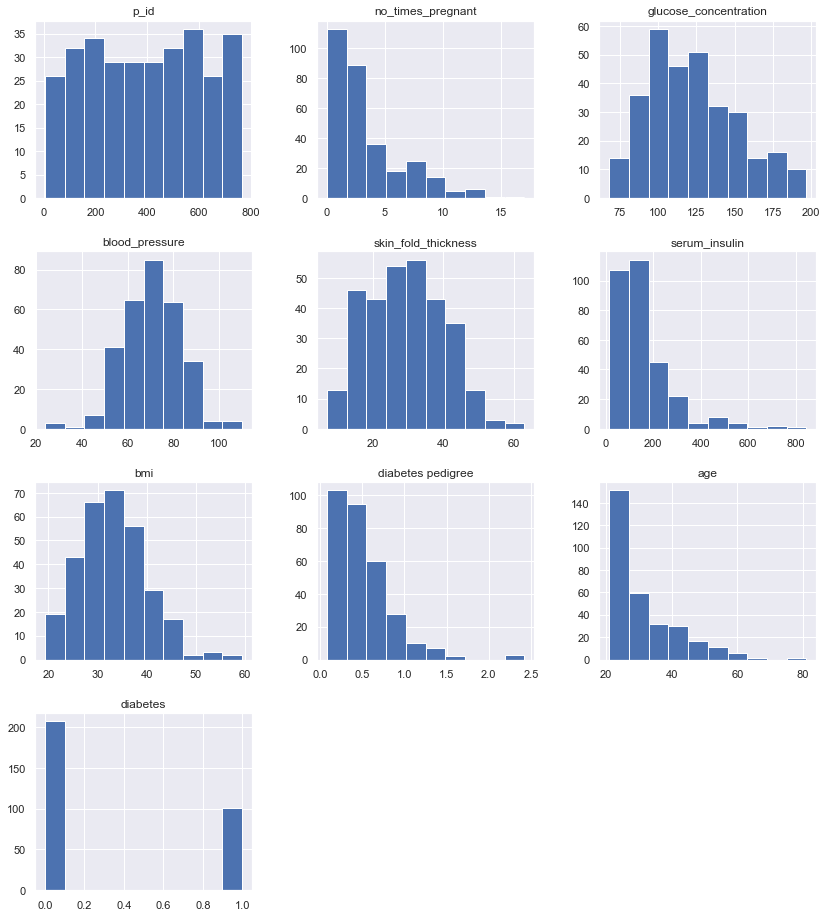

In [488]:
sns.set()
raw_df.hist(figsize=(14,16))

#### Step 6: Correlation and Causation

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

In [489]:
raw_df.corr()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
p_id,1.000000,-0.060073,-0.026744,0.091801,-0.020709,-0.017006,-0.010840,-0.034004,-0.038069,-0.129148
no_times_pregnant,-0.060073,1.000000,0.169406,0.213361,0.100819,0.027848,-0.038990,0.033506,0.683122,0.255631
glucose_concentration,-0.026744,0.169406,1.000000,0.229480,0.192839,0.579042,0.232221,0.144064,0.309478,0.518470
blood_pressure,0.091801,0.213361,0.229480,1.000000,0.254379,0.103938,0.281140,-0.031606,0.279831,0.182839
skin_fold_thickness,-0.020709,0.100819,0.192839,0.254379,1.000000,0.159252,0.678375,0.167127,0.196077,0.221219
serum_insulin,-0.017006,0.027848,0.579042,0.103938,0.159252,1.000000,0.214712,0.127666,0.215682,0.283477
bmi,-0.010840,-0.038990,0.232221,0.281140,0.678375,0.214712,1.000000,0.170066,0.071883,0.234534
diabetes pedigree,-0.034004,0.033506,0.144064,-0.031606,0.167127,0.127666,0.170066,1.000000,0.096697,0.211603
age,-0.038069,0.683122,0.309478,0.279831,0.196077,0.215682,0.071883,0.096697,1.000000,0.333001
diabetes,-0.129148,0.255631,0.518470,0.182839,0.221219,0.283477,0.234534,0.211603,0.333001,1.000000


### Part B: Performing KNN

#### Step 1: Split up the dataset into inputs and targets

In [490]:
df = df.drop(columns=['p_id'])
y = df['diabetes'].values
X = df.drop(columns=['diabetes'])

#### Step 2: Split the dataset into train and test data

In [491]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

#### Step 3: Selecting the best value for k

In [492]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

cost = []

# Calculating MAE cost for the values of k vetween 2 to 20 and append them to cost list.
for i in range(2, 20):
    KNN_model = KNeighborsRegressor(n_neighbors=i)
    KNN_model.fit(X_train, y_train)
    pred_i = KNN_model.predict(X_test)
    mean_AE = mean_absolute_error(y_test, pred_i)
    cost.append(mean_AE)

Text(0, 0.5, 'Mean Absolute Error')

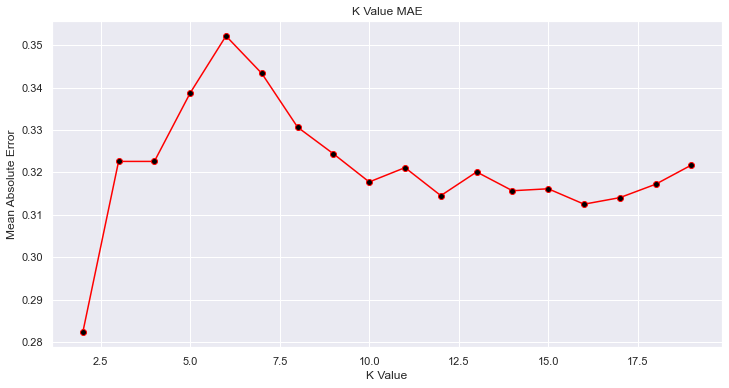

In [493]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(2, 20), cost, color='red',  marker='o', markerfacecolor='black')
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Hence, we can conclude that the best value to take for k in k-nearest neighbours is 5, since it will minimize the Mean Absolute Error and provide the best model.

#### Step 4: Building and training the model

In [494]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
KNN_model = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

#### Step 5: Testing the model

In [495]:
y_pred = KNN_model.predict(X_test)

#### Step 6: Analysing performance

In [496]:
#check accuracy of our model on the test data
KNN_model.score(X_test, y_test)

0.6774193548387096

In [497]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Mean Absolute Error:  0.3225806451612903
Mean Squared Error:  0.3225806451612903
Root Mean Squared Error:  0.5679618342470648


### Part C: Performing KNN on the scaled data

#### Scaling the data and reperforming KNN

In [498]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
transformed = sc.fit_transform(X)
X_scaled =  pd.DataFrame(transformed,
        columns=['Pregnancies_count', 'Glucose_concentration', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_scaled.head()

,Pregnancies_count,Glucose_concentration,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.415852,-0.347165,-0.187258,-0.675359,-0.517880,0.130776,-0.579761,-0.468472
1,2.382065,0.687396,1.866935,0.346121,-0.095990,0.487733,-0.755615,2.012432
2,-0.415852,-0.981252,-0.503287,0.253260,0.017596,0.687628,0.455181,-0.766180
3,-0.726732,-0.080182,0.760831,1.739049,0.342127,0.816133,1.862011,1.020070
4,-0.104972,0.186802,0.128772,-0.396773,0.260995,-0.111955,0.094825,-0.369236


In [499]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

In [500]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
KNN_model = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
KNN_model.fit(X1_train,y1_train)

KNeighborsClassifier()

In [501]:
y_pred_scaled = KNN_model.predict(X1_test)

In [502]:
#Check the Accuracy Score of the Scaled/Normalized version of Data
KNN_model.score(X1_test, y1_test)


0.8064516129032258

In [503]:
mae = mean_absolute_error(y1_test, y_pred_scaled)
mse = mean_squared_error(y1_test, y_pred_scaled)
rmse = mean_squared_error(y1_test, y_pred_scaled, squared=False)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Mean Absolute Error:  0.1935483870967742
Mean Squared Error:  0.1935483870967742
Root Mean Squared Error:  0.43994134506405985


As we can note that the scaled data did improve the performance. The KNN_model score went up from around 0.68 to around 0.80. Which is a huge jump in terms of accuracy of the model. Furthermore, our performance metrics also show that the Mean Absolute Error, Mean Squared Error and the Root Mean Squared Error all decreased by about 0.11, which is great in terms of the reliability of the model. This is highly due to the fact that the bias is reduced as the range of values in fields like age were from 21 to 81 etc. This helps us normalize the value and put all the features at an equal footing.

#### Part D: Comparing the performance of the best KNN classifier with the Naïve Bayes algorithm.

KNN and Naive Bayes algorithm, are both examples of supervised learning. However, Naive Bayes is a linear classifier while K-NN is not. For Naive Bayes, When used with massive data, it frequently runs quicker. Because of the calculations needed for each new step in the process, KNN is typically slower for large data sets. Naive Bayes is preferable to KNN if speed is a concern. Furthermore, the Naive Bayes algorithm doesn't have issues with the curse of dimensionality and large feature sets unlike KNN. However, In favor of KNN, You don't need to be familiar with the underlying probability distributions in order to use KNN.

Since this is not a relatively big dataset with a large feature set it is tempting to think that KNN classifier will work better. However, The Naive Bayes algorithm works well here due to the fact that the probability distributions are very much available for each feature. It helps to linearly classify this dataset using an algorithm like Naive Bayes.